# Pi Day 2016

## Introduction: Exponential Polygons

Welcome to Pi Day 2016 in Bend, OR! This year let's do a deterministic approximation using lots of Pythagoras and no trigonometry. The basic idea is to inscribe polygons, with progressively more sides, within a unit circle. The hope is that the area of the polygons will approach the area of the circle, which is $\pi r^2 = \pi$. To illustrate:

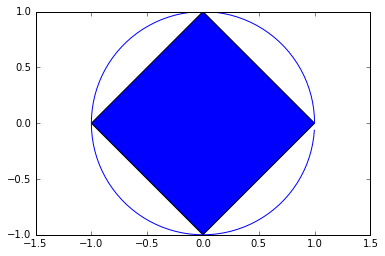

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def drawPolygon (n):
    """Draw an n-sided polygon centered at the origin."""
    theta = np.linspace (0, 2 * np.pi, n, endpoint=False)
    plt.fill (np.cos (theta), np.sin (theta))
    plt.axis ('equal')

def drawCircle (samples=100, r=1):
    """Draw a circle centered at the origin."""
    theta = np.linspace (0, 2 * np.pi, samples, endpoint=False)
    plt.plot (np.cos (theta), np.sin (theta))
    plt.axis ('equal')

drawCircle ()
drawPolygon (4)

There's a square inscribed on a circle, which leaves four caps uncovered. The area of the inscribed square is $2$, which is clearly a lousy approximation to $pi$. More sides will surely be better. Details!
## Triangles in the square
We need to know the dimensions of that square. (Why is its area=2?)
First let's split it in half to get two identical Isosceles triangles.

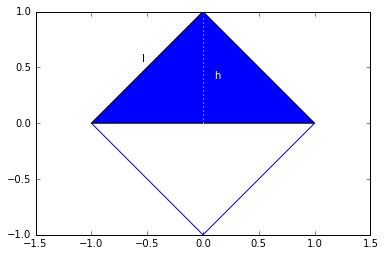

In [10]:
plt.fill ((-1, 0, 1), (0, 1, 0));
plt.text (-0.55, 0.55, 'l')
plt.plot ((0, 0), (0, 1), 'w:')
plt.text (0.1, 0.4, 'h', color='w')
plt.plot ((-1, 0, 1), (0, -1, 0))
plt.axis ('equal');

The base of that rather squashed-looking right Isosceles triangle is of length $2$.
The two legs are of length $l$, so Pythagoras tells us that:
\begin{align}
l^2 + l^2 & = 2^2 \\
l^2 & = 4 / 2 = 2 \\
l & = \sqrt{2}.
\end{align}

The height of the triangle $h=1$ by construction.
The area is:
\begin{align}
A & = b h / 2 \\
 & = 2 \cdot 1 / 2 \\
 & = 1.
\end{align}

Therefore the area of the square, composed of two triangles, is $1 + 1 = 2$.
Fortunately, that's the same as the area computed as the product of lengths of its sides: $\sqrt{2} \cdot \sqrt{2} = 2.$

Now let's cut the square again.

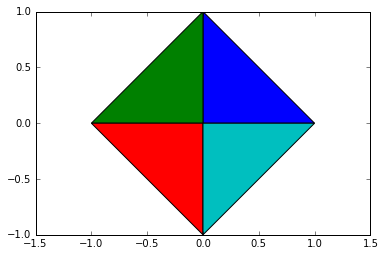

In [11]:
def polygonFromTriangles (n):
    """Draw a polygon composed of Isosceles triangles."""
    theta = 2 * np.pi / n
    for i in range (n):
        plt.fill ((0, np.cos (theta * i), np.cos (theta * (i + 1))),
                 (0, np.sin (theta * i), np.sin (theta * (i + 1))))
    plt.axis ('equal')

# Draw a square
polygonFromTriangles (4)

This decomposes the square into four Isosceles triangles.
The legs of the triangles are of length $1$, and the bases, as we have seen, are $\sqrt{2}$.

## Generalized area of an Isosceles triangle

Given an Isosceles triangle with base $b$ and legs $l$, to compute the area $A=bh/2$ we first need to find the height $h$.
As in the half-square above, the height is one leg of a right triangle with hypotenuse $l$ and other leg $b/2$; so that dear loon Pythagoras once again rides to our rescue.
\begin{align}
l^2 & = h^2 + (b/2)^2 \\
h & = \sqrt{l^2 - (b/2)^2}.
\end{align}

And thus the area:
\begin{align}
A & = b h / 2 \\
 & = {b \sqrt{l^2 - (b/2)^2} \over 2}.
\end{align}

In [16]:
def isoscelesArea (b, l):
    """Compute area of an Isosceles triangle with one side of length b and two of length l."""
    return b * np.sqrt (l * l - b * b / 4) / 2

print ('Half-square area: {0:f}'.format (isoscelesArea (2, np.sqrt (2))))
print ('Quarter-square area: {0:f}'.format (isoscelesArea (np.sqrt (2), 1)))

Half-square area: 1.000000
Quarter-square area: 0.500000


## Area of an $n$-sided polygon

